In [1]:
from faker import Faker

fake = Faker(locale = 'en_GB')

first_name = fake.first_name()
last_name = fake.last_name()

address_line1 = fake.street_address()
address_line2 = fake.county()
postcode = fake.postcode()

In [2]:
print(fake)

print('-', first_name)
print('-', last_name)

print('-', address_line1)
print('-', address_line2)
print('-', postcode)

- Brett
- Butler
- Flat 4
Taylor knolls
- Fife
- WA92 7DU


In [3]:
from PIL import Image, ImageDraw, ImageFont
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import random

In [4]:
template_path = './council_tax.jpg'
template = Image.open(template_path)
page = [template.copy()]

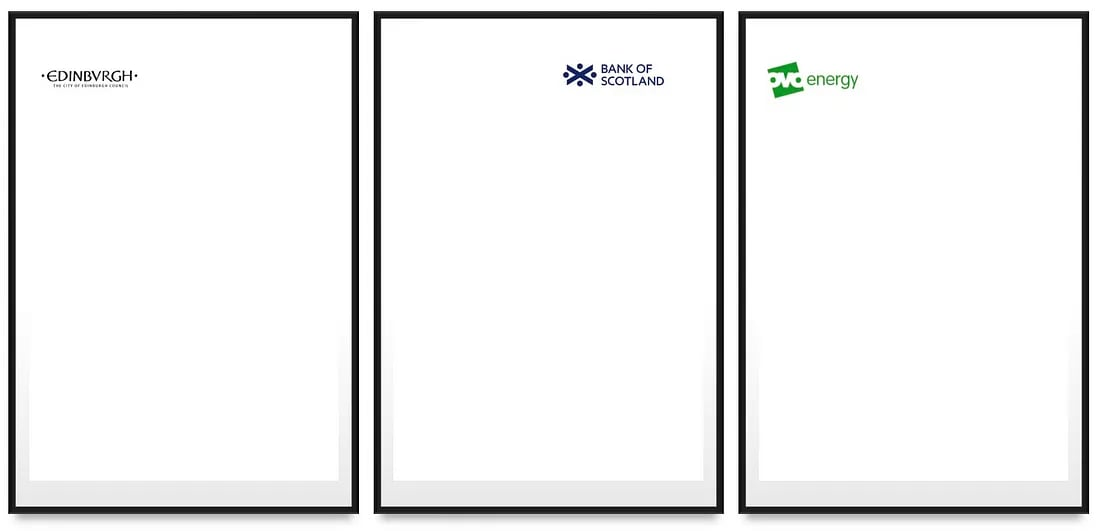

In [5]:
page[0]

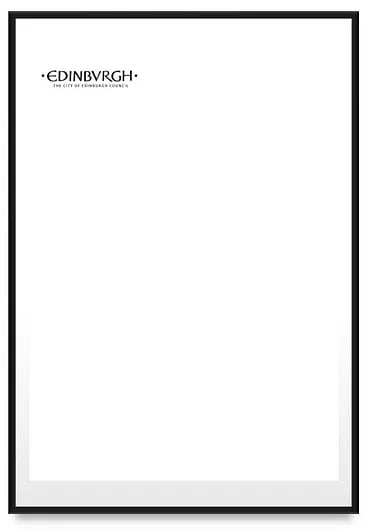

In [6]:
img = page[0]
num_splits = 3
img_width, img_height = img.size
frame_width = img_width // num_splits
frames = []

for i in range(num_splits):
    left = i * frame_width
    right = left + frame_width
    frame = img.crop((left, 0, right, img_height))
    frames.append(frame)
frames[0]

In [7]:
def get_day_suffix(day):
    if 4 <= day <= 20 or 24 <= day <= 30:
        return "th"
    else:
        return ["st","nd","rd"][day % 10 - 1]

def generate_random_dates(start_date, end_date):
    delta = end_date - start_date
    random_days = random.randint(0, delta.days)
    return start_date + timedelta(days=random_days)

def format_date(dt: datetime):
    day = dt.day
    suffix = get_day_suffix(day)
    return dt.strftime(f'%B {day}{suffix}, %Y')

start_date = datetime(2024, 1, 1)
end_date = datetime(2024, 12, 31)

date = generate_random_dates(start_date, end_date)
formatted_date = format_date(date)
formatted_date

'November 8th, 2024'

In [8]:
first_name = fake.first_name()
last_name = fake.last_name()
address_line1 = fake.street_address()
address_line2 = fake.county()
postcode = fake.postcode()

fake_client_number = fake.random_number(digits=8)
fake_account_number = fake.random_number(digits=11)
fake_online_number = fake.random_number(digits=8)

In [9]:
font_small = ImageFont.truetype("arial.ttf", size = 11)
font_medium = ImageFont.truetype("arial.ttf", size = 14)
font_large = ImageFont.truetype("arial.ttf", size = 18)

font_bold = ImageFont.truetype("arialbd.ttf", size = 11)
font_medium_bold = ImageFont.truetype("arialbd.ttf", size = 14)

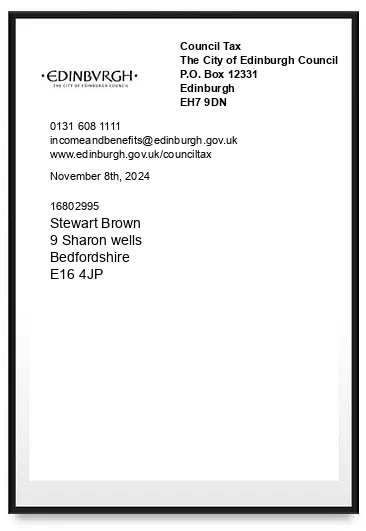

In [10]:
draw = ImageDraw.Draw(frames[0])
draw.text((180, 40), 'Council Tax \nThe City of Edinburgh Council \nP.O. Box 12331 \nEdinburgh \nEH7 9DN', font = font_bold, fill = (0,0,0))

draw.text((50, 120), '0131 608 1111 \nincomeandbenefits@edinburgh.gov.uk \nwww.edinburgh.gov.uk/counciltax', font = font_small, fill = (0,0,0))
draw.text((50, 170), f'{formatted_date}', font = font_small, fill = (0,0,0))

draw.text((50, 200), f'{fake_client_number}', font = font_small, fill = (0,0,0))
draw.text((50, 215), f'{first_name} {last_name} \n{address_line1} \n{address_line2} \n{postcode}', font = font_medium, fill = (0,0,0))

frames[0]

In [11]:
frames[0].save(f'council_tax_image.png','PNG',resolution =100.0, save_all=True)
frames[0].save(f'council_tax_pdf.pdf','PDF',resolution =100.0, save_all=True)

In [12]:
import pytesseract
import fitz

In [13]:
def extract_text_from_image(png_path):
    image = Image.open(png_path)
    extracted_text = []

    img_text = pytesseract.image_to_string(image)
    extracted_text.append(img_text)
    
    return extracted_text

img_path = 'council_tax_image.png'
extracted_text_from_img = extract_text_from_image(img_path)
print(extracted_text_from_img)

def extract_text_from_pdf(pdf_file):
    text = ''
    with fitz.open(filename=pdf_file, filetype='pdf') as file:
        for page in file:
            text += page.get_text()
    return text

pdf_path = 'council_tax_pdf.pdf'
extracted_text_from_pdf = extract_text_from_pdf(pdf_path)
extracted_text_from_pdf

['‘Council Tax\n‘The City of Edinburgh Council\n-€DINBVRGH: P.O. Box 12331\n: Edinburgh\nEH7 9DN\n0131 608 1111\nincomeandbenefits@ edinburgh. gov.uk\nwonwedinburgh govuk/eouncitax\n\nNovember 8th, 2024\n\n116802995\nStewart Brown\n9 Sharon wells\nBedfordshire\n\nE16 4JP\n\n']


''

In [14]:
def _prompt(question, context):
    prompt = f"""{question}
    Context:
    ```
    {context[0]}
    ```
    """
    return prompt

question = 'What email is in the Council Tax?'
prompt = _prompt(question, extracted_text_from_img)
print(prompt)

c:\Users\dangc\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


What email is in the Council Tax?
    Context:
    ```
    ‘Council Tax
‘The City of Edinburgh Council
-€DINBVRGH: P.O. Box 12331
: Edinburgh
EH7 9DN
0131 608 1111
incomeandbenefits@ edinburgh. gov.uk
wonwedinburgh govuk/eouncitax

November 8th, 2024

116802995
Stewart Brown
9 Sharon wells
Bedfordshire

E16 4JP


    ```
    


In [15]:
import openai

### paid version
# def _info_extraction(prompt, deployment):
#     completions = openai.Completion.create(
#         deployment_id=deployment,
#         prompt= prompt,
#         top_p = 0.9,
#         temperature=0,
#         max_tokens=200)
    
#     return completions['choices'][0]['message']['content'].strip()

# response = _info_extraction(prompt, 'text-davinci-003')
# response

In [16]:
from transformers import GPTNeoForCausalLM, GPT2Tokenizer, GPT2LMHeadModel

### free version
def _info_extraction(prompt: str, model_name: str = 'distilgpt2') -> str:
    # Load model and tokenizer
    tokenizer = GPT2Tokenizer.from_pretrained(model_name)
    if model_name == 'EleutherAI/gpt-neo-125M':
        model = GPTNeoForCausalLM.from_pretrained(model_name) 
    elif model_name == 'distilgpt2':
        model = GPT2LMHeadModel.from_pretrained(model_name) 

    inputs = tokenizer(prompt, return_tensors="pt")
    outputs = model.generate(
        inputs.input_ids,
        attention_mask=inputs['attention_mask'],
        pad_token_id=tokenizer.eos_token_id,
        max_length=200, 
        num_return_sequences=1)
    return tokenizer.decode(outputs[0], skip_special_tokens=True).strip()

response = _info_extraction(prompt)
response

c:\Users\dangc\AppData\Local\Programs\Python\Python311\Lib\site-packages\transformers\tokenization_utils_base.py:1617: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be deprecated in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


'What email is in the Council Tax?\n    Context:\n    ```\n    ‘Council Tax\n‘The City of Edinburgh Council\n-€DINBVRGH: P.O. Box 12331\n: Edinburgh\nEH7 9DN\n0131 608 1111\nincomeandbenefits@ edinburgh. gov.uk\nwonwedinburgh govuk/eouncitax\n\nNovember 8th, 2024\n\n116802995\nStewart Brown\n9 Sharon wells\nBedfordshire\n\nE16 4JP\n\n\n    ```\n     ‘Council Tax\n‘The City of Edinburgh Council\n-€DINBVRGH: P.O. Box 12331\n: Edinburgh\nEH7 9DN\n0131 608 1111\nincomeandbenefits@ edinburgh. gov.uk\nwonwedinburgh govuk/eouncit'

In [ ]:
model = GPTNeoForCausalLM.from_pretrained('EleutherAI/gpt-neo-125M')

In [19]:
model.base_model

GPTNeoModel(
  (wte): Embedding(50257, 768)
  (wpe): Embedding(2048, 768)
  (drop): Dropout(p=0.0, inplace=False)
  (h): ModuleList(
    (0-11): 12 x GPTNeoBlock(
      (ln_1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
      (attn): GPTNeoAttention(
        (attention): GPTNeoSelfAttention(
          (attn_dropout): Dropout(p=0.0, inplace=False)
          (resid_dropout): Dropout(p=0.0, inplace=False)
          (k_proj): Linear(in_features=768, out_features=768, bias=False)
          (v_proj): Linear(in_features=768, out_features=768, bias=False)
          (q_proj): Linear(in_features=768, out_features=768, bias=False)
          (out_proj): Linear(in_features=768, out_features=768, bias=True)
        )
      )
      (ln_2): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
      (mlp): GPTNeoMLP(
        (c_fc): Linear(in_features=768, out_features=3072, bias=True)
        (c_proj): Linear(in_features=3072, out_features=768, bias=True)
        (act): NewGELUActivation()